In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('./anscombe_quartet_data.csv')
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      11 non-null     int64  
 1   y1      11 non-null     float64
 2   x2      11 non-null     int64  
 3   y2      11 non-null     float64
 4   x3      11 non-null     int64  
 5   y3      11 non-null     float64
 6   x4      11 non-null     int64  
 7   y4      11 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 832.0 bytes


##### <span style='color:blue'> Question 1. Using the Anscombe’s dataset, we reviewed earlier in class, create a subplot that shows how each x column correlates with each y column.
Using the Anscombe’s dataset, we reviewed earlier in class, create a subplot that shows how each x column correlates with each y column.

Each of your plots should be a scatter diagram together with a line chart that goes through the diagonal of the chart as seen in the original Anscombe’s quartet plot 
    
You’re to implement your solution using the different methods highlighted for creating subplots in class. That means you’re to have 4 subplots for each method.
    
Each of your plots should have a title such as (x1,y1), (x2,y2), etc
    
Link to Anscombe quartet dataset can be found Here</span>

In [28]:
#function to get the regression y axis(line of best fit). I'm using this function beause plt.plot is not calling the line graph 
def regression_y_axis(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    new_y_value = b_0 + b_1*x
    return new_y_value


## The First Method
Using the command plt.subplot() to call each set of axes

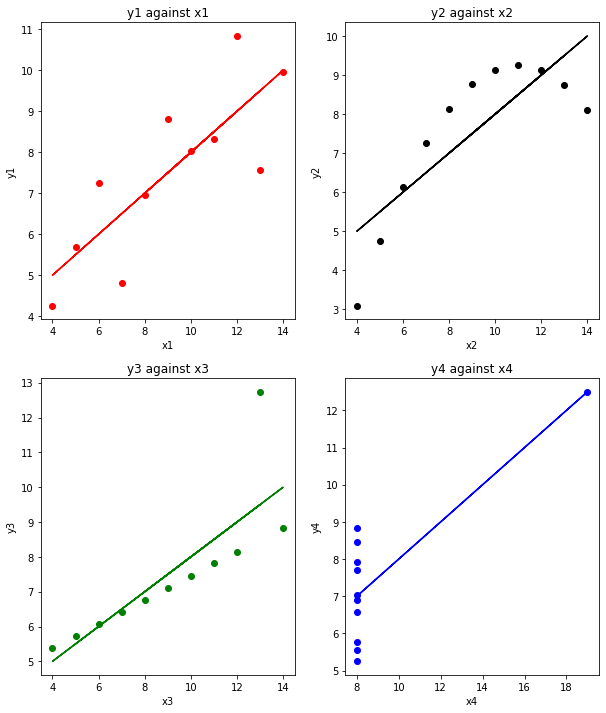

In [29]:
##I am going to be using function to avoid repetition of writing of codes
plt.figure(figsize=(10,12))

def draw_plot( x_axis, y_axis, title, x_label, y_label, position, color):
    plt.subplot(2,2,position) 
    plt.scatter(x_axis, y_axis, color= color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    y = regression_y_axis(x_axis, y_axis)
    plt.plot(x_axis, y, color = color)


x_values = df['x1']
y_values = df['y1']
draw_plot(x_values, y_values, 'y1 against x1', 'x1' ,'y1', 1, 'red')


x_values = df['x1']
y_values = df['y2']
draw_plot(x_values, y_values, 'y2 against x2','x2' ,'y2', 2, 'black')


x_values = df['x3']
y_values = df['y3']
draw_plot(x_values, y_values, 'y3 against x3','x3' ,'y3', 3, 'green')


x_values = df['x4']
y_values = df['y4']
draw_plot(x_values, y_values, 'y4 against x4','x4' ,'y4', 4, 'blue')


plt.show()

## The Second Method
Creating a pyplot figure object by using ax.plot()

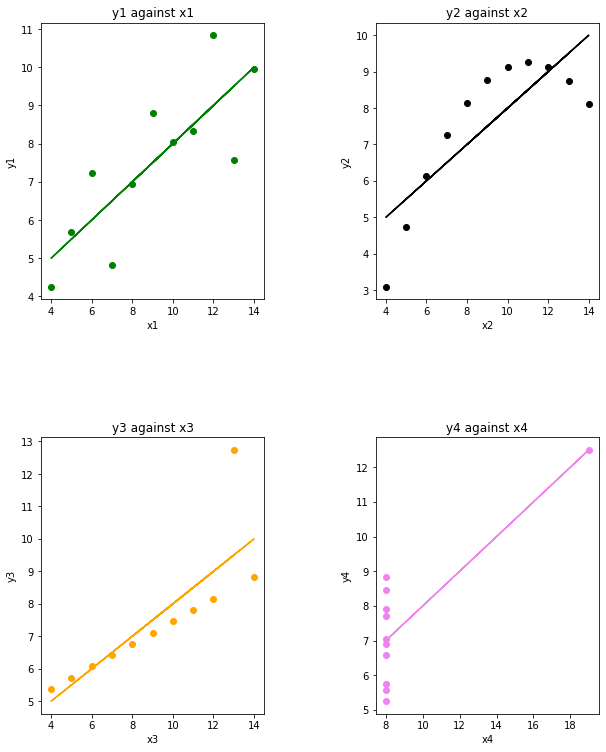

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))

def draw_plot(ax, x_axis, y_axis, color, title, xlabel, ylabel):
    ax.scatter(x_axis, y_axis, color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    y = regression_y_axis(x_axis, y_axis)
    ax.plot(x_axis, y, color = color)
    
    
x_values = df['x1']
y_values = df['y1']
draw_plot(ax1, x_values, y_values, 'green', 'y1 against x1', 'x1', 'y1')



x_values = df['x2']
y_values = df['y2']
draw_plot(ax2, x_values, y_values, 'black', 'y2 against x2', 'x2', 'y2')


x_values = df['x3']
y_values = df['y3']
draw_plot(ax3, x_values, y_values, 'orange', 'y3 against x3', 'x3', 'y3')

              

x_values = df['x4']
y_values = df['y4']  
draw_plot(ax4, x_values, y_values, 'violet', 'y4 against x4', 'x4', 'y4')

              
              
                         
plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)


## The Third Method
Adjusting the sub_plots width, height, bottom and top

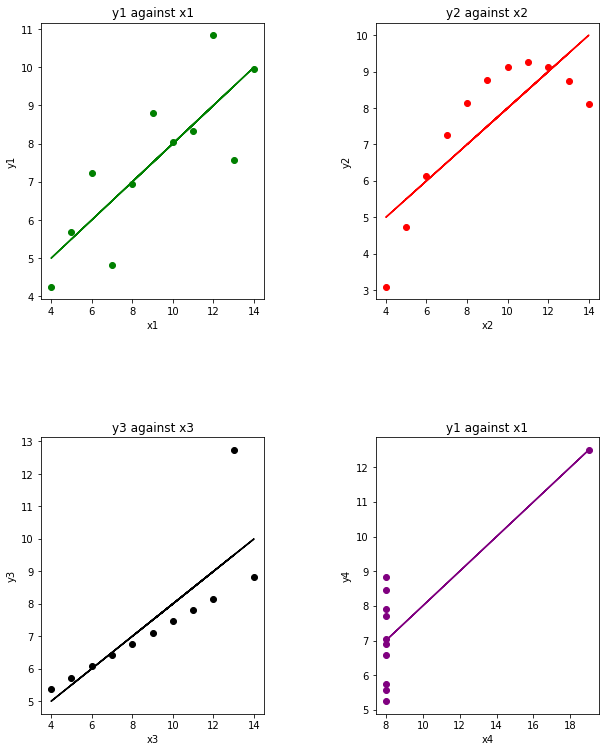

In [31]:
fig = plt.figure(figsize=(10, 12))

def draw_plot(x_axis, y_axis, color, xlabel, ylabel, x, title):
    ax = fig.add_subplot(x, title=title)
    ax.scatter(x_axis, y_axis, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    y= regression_y_axis(x_axis, y_axis)
    ax.plot(x_axis, y, color = color)

x_values = df['x1']
y_values = df['y1']
draw_plot(x_values, y_values, 'green', 'x1', 'y1', 221, 'y1 against x1')


x_values = df['x2']
y_values = df['y2']
draw_plot(x_values, y_values, 'red', 'x2', 'y2', 222, 'y2 against x2')


x_values = df['x3']
y_values = df['y3']
draw_plot(x_values, y_values,'black', 'x3', 'y3', 223, 'y3 against x3')

x_values = df['x4']
y_values = df['y4'] 
draw_plot(x_values, y_values, 'purple', 'x4', 'y4', 224, 'y1 against x1')


plt.subplots_adjust(wspace=0.5, hspace=0.5, bottom=0.1, top=0.9)

## The Fourth Method
Modify Ticks and using legends 

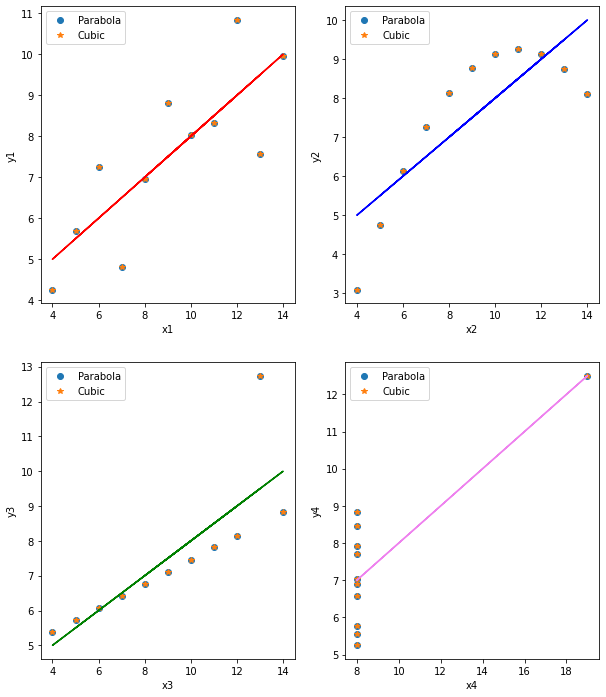

In [32]:
fig = plt.figure(figsize=(10, 12))
def draw_plot(x_axis,y_axis, label_1,label_2, a, b,color, position, xlabel, ylabel ):
    ax = plt.subplot(2,2,position)
    plt.plot(x_axis, y_axis, a, label=label_1)
    plt.plot(x_axis, y_axis, b, label=label_2)
    plt.legend(loc= 'upper left')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    y= regression_y_axis(x_axis, y_axis)
    ax.plot(x_axis, y, color = color)




x_values = df['x1']
y_values = df['y1']
draw_plot(x_values, y_values, 'Parabola', 'Cubic','o','*', 'red', 1, 'x1', 'y1' )

x_values = df['x2']
y_values = df['y2']
draw_plot(x_values, y_values, 'Parabola', 'Cubic','o','*', 'blue',2, 'x2', 'y2')


x_values = df['x3']
y_values = df['y3']
draw_plot(x_values, y_values, 'Parabola', 'Cubic','o','*', 'green', 3, 'x3', 'y3')

x_values = df['x4']
y_values = df['y4']
draw_plot(x_values, y_values, 'Parabola', 'Cubic','o','*', 'violet', 4, 'x4', 'y4')
plt.show()
